# Travelling Salesman Problem

The Travelling Salesman Problem describes a salesman who must travel between N cities. The order in which he does so is something he does not care about, as long as he visits each once during his trip, and finishes where he was at first. Each city is connected to other close by cities, or nodes, by airplanes, or by road or railway. Each of those links between the cities has one or more weights (or the cost) attached. The cost describes how "difficult" it is to traverse this edge on the graph, and may be given, for example, by the cost of an airplane ticket or train ticket, or perhaps by the length of the edge, or time required to complete the traversal. The salesman wants to keep both the travel costs, as well as the distance he travels as low as possible.

The Traveling Salesman Problem is typical of a large class of NP-hard optimization problems that have intrigued mathematicians and computer scientists for years. Most important, it has applications in science and engineering. For example, in the manufacture of a circuit board, it is important to determine the best order in which a laser will drill thousands of holes. An efficient solution to this problem reduces production costs for the manufacturer.

[Wikipedia](https://en.wikipedia.org/wiki/Travelling_salesman_problem)

[Simple Wikipedia](https://simple.wikipedia.org/wiki/Travelling_salesman_problem#targetText=The%20Travelling%20Salesman%20Problem%20describes,where%20he%20was%20at%20first.)

### Imports

In [1]:
from random import uniform, shuffle
from math import sqrt, inf, factorial
from itertools import permutations
from time import time, sleep
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

### Generate cities data

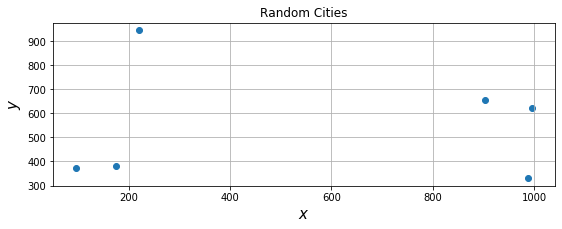

In [16]:
total_cities = 6

cities = [[],[]]
for i in range(total_cities):
    cities[0].append(uniform(0,1000))
    cities[1].append(uniform(0,1000))
    
fig, axs = plt.subplots(figsize=(9,3))
xArr, yArr = cities[0], cities[1]
axs.scatter(xArr, yArr)
axs.set_xlabel(r'$x$', fontsize=15)
axs.set_ylabel(r'$y$', fontsize=15)
axs.set_title('Random Cities')

axs.grid(True)

## Function Declarations

### Function to get the distance between two points
$ \sqrt{(x2-x1)^2 + (y2-y1)^2} $

In [3]:
def dist(point1, point2):
    x1, y1, x2, y2 = point1[0], point1[1], point2[0], point2[1]
    return sqrt((x2-x1)**2 + (y2-y1)**2)

### Function to shuffle cities

In [4]:
def shuffle_cities(cities):
    xArr, yArr = cities[0], cities[1]
    points = list(zip(xArr, yArr))
    shuffle(points)
    cities[0], cities[1] = zip(*points)
    return cities

### Function to calculate the sum of the distance between cities

In [5]:
def calculate_distance(cities):
    accum = 0
    xArr, yArr = cities[0], cities[1]
    for i in range(len(xArr)-1):
        point1, point2 = (xArr[i], yArr[i]), (xArr[i+1], yArr[i+1])
        accum += dist(point1, point2)
    return accum

### Function to obtain closest city

In [6]:
def get_closest(point1, cities, visited):
    best_distance = float('Inf')
    for i, coord in enumerate(cities[0]):
        if i not in visited:
            distance = dist((cities[0][point1], cities[1][point1]), (cities[0][i], cities[1][i]))
                            
            if distance < best_distance:
                closest = i
                best_distance = distance
        if len(visited)==len(cities[0]):
            closest = visited[0]
            best_distance = dist((cities[0][0], cities[1][0]), (cities[0][point1], cities[1][point1]))
                
    return closest

### Function to plot an iteration and plot current optimum distance

In [7]:
def plot_iteration_and_optimum(cities, record_cities, n_iterations, distance, record_distance):
    clear_output(wait=True)
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    iteration_plt, optimum_plt = axs[0], axs[1]
    
    # Plot each iteration with red
    for i in range(len(cities[0]) - 1): iteration_plt.plot(cities[0][i:i+2], cities[1][i:i+2], 'ro-')
    iteration_plt.plot([cities[0][-1], cities[0][0]],[cities[1][-1], cities[1][0]],'ro-')
    iteration_plt.set_title(f'Every Iteration\nDistance: {distance} \nEvaluation no. {n_iterations}')
    
    # Plot the current optimum
    for i in range(len(record_cities[0]) - 1): optimum_plt.plot(record_cities[0][i:i+2], record_cities[1][i:i+2], 'go-')
    optimum_plt.plot([record_cities[0][-1], record_cities[0][0]],[record_cities[1][-1], record_cities[1][0]],'go-')
    optimum_plt.set_title(f'Current Optimum\nDistance: {record_distance}')
        
    plt.show();

### Function to plot informed search algorithms

In [8]:
def plot_greedy(all_cities, cities_visited, step_number, distance, end):
    clear_output(wait=True)
    fig, axs = plt.subplots(figsize=(6, 6))
    iteration_plt = axs
    iteration_plt.axis([0,1000,0,1000])
    
    # Plot all nodes with red
    iteration_plt.plot(all_cities[0], all_cities[1], 'ro')
    
    # Plot journey with blue
    for i in range(len(cities_visited[0]) - 1): 
        iteration_plt.plot(cities_visited[0][i:i+2], cities_visited[1][i:i+2], 'bo-')
        iteration_plt.plot(cities_visited[0], cities_visited[1], 'bo')
        
    # Add path from final node to starting node
    if end == True: iteration_plt.plot([cities_visited[0][-1], cities_visited[0][0]],[cities_visited[1][-1], cities_visited[1][0]],'bo-')
    
    iteration_plt.set_title(f'Distance: {distance} \nStep no. {step_number}')
        
    plt.show();

### Random Shuffle
Shuffle randomly to get the best possible answer

This method could converge faster than brute force but does not ensure global optimum

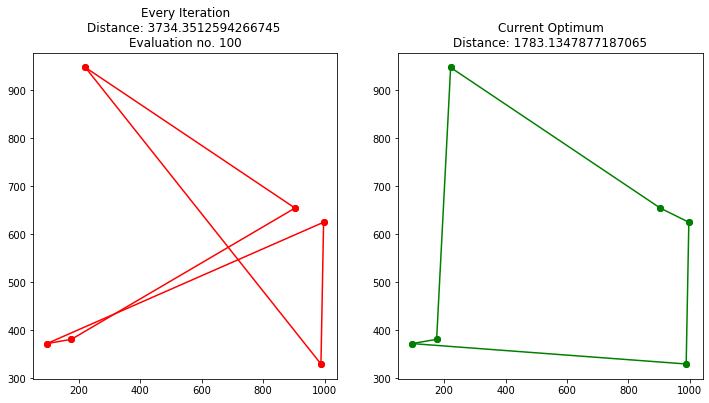

elapsed time: 26.68 seconds


In [18]:
def rand_shuffle(iterations=0):
    record_distance = inf
    for i in range(iterations):
        current_distance = calculate_distance(cities)
        if current_distance < record_distance:
            record_distance = current_distance
            record_cities = cities.copy()
        plot_iteration_and_optimum(
            cities, record_cities, n_iterations=i+1, 
            distance=current_distance, record_distance=record_distance
        )
        shuffle_cities(cities)
start_time = time()
rand_shuffle(iterations=100)
elapsed_time = time() - start_time
print(f'elapsed time: {elapsed_time:.2f} seconds')

### Brute Force
Get all permutations of the cities and test all possible combinations
Where all possible combinations is: $ factorial(nCities) $

In [10]:
print(f'Number of iterations = factorial({total_cities}) = {factorial(total_cities)}')

Number of iterations = factorial(10) = 3628800


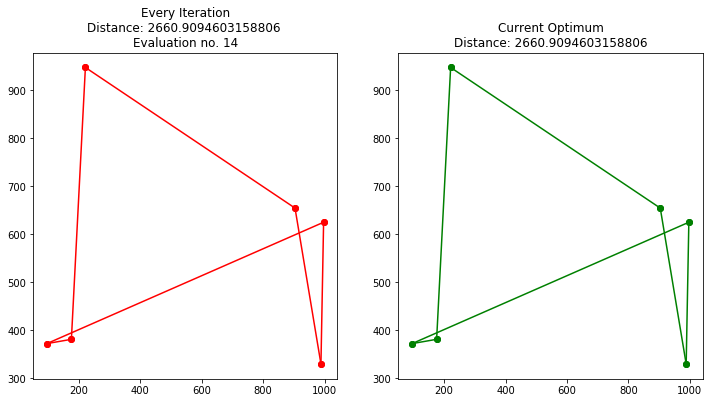

In [ ]:
def brute():
    record_distance = inf
    n_iterations = 1
    for permutation in permutations(list(zip(cities[0],cities[1]))):
        permutation = list(permutation)
        cities[0], cities[1] = zip(*permutation)
        current_distance = calculate_distance(cities)
        if current_distance < record_distance:
            record_distance = current_distance
            record_cities = cities.copy()
        plot_iteration_and_optimum(
            cities, record_cities, n_iterations, 
            distance=current_distance, record_distance=record_distance
        )
        n_iterations += 1
start_time = time()
brute()
elapsed_time = time() - start_time
print(f'elapsed time: {elapsed_time:.2f} seconds')

### Informed Search
#### Greedy
Goes for the closest city at each step

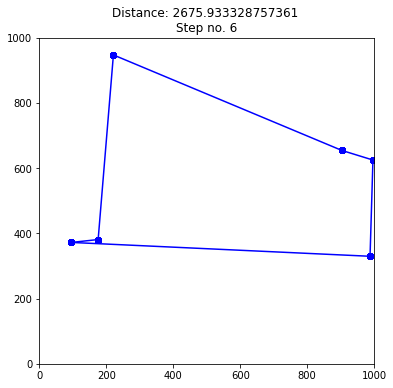

elapsed time: 3.93 seconds


In [17]:
def greedy():
    length = 0
    best_length = inf
    order = [0]
    best_order = []
    steps_taken = 0
    cities_visited = [[cities[0][0]],[cities[1][0]]]
    cities_visited[0].append(cities[0][0])
    cities_visited[1].append(cities[1][0])
    current_distance = 0
    plot_greedy(all_cities=cities, cities_visited=cities_visited, step_number=steps_taken, distance=current_distance, end = False)
    for i, city in enumerate(cities[0]):
        sleep(.5)
        steps_taken += 1
        closest = get_closest(order[i],cities,order)
        order.append(closest)
        cities_visited[0].append(cities[0][closest])
        cities_visited[1].append(cities[1][closest])
        current_distance = calculate_distance(cities_visited)
        plot_greedy(all_cities=cities, cities_visited=cities_visited, step_number=steps_taken, distance=current_distance, end = False)
        
        
    
start_time = time()
greedy()
elapsed_time = time() - start_time
print(f'elapsed time: {elapsed_time:.2f} seconds')  